# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [30]:
df_clustered = pd.read_csv('/content/Final Elite Sports Cars.csv') #buka dataset
df_clustered.head() #tampilkan

,Engine_Size,Horsepower,Torque,Weight,Top_Speed,Acceleration_0_100,Fuel_Efficiency,CO2_Emissions,Price,Mileage,...,Market_Demand_Low,Market_Demand_Medium,Modification_Nismo,Modification_RS,Modification_Sport,Modification_Supercharged,Modification_Track Edition,Modification_Turbo,Modification_V-Spec,Cluster
0,3.7,420,705,1785,238,5.7,10.5,307,81580,96664,...,False,True,False,False,False,False,False,False,True,2.0
1,4.2,810,1222,2130,245,2.1,7.4,176,398429,222953,...,False,True,True,False,False,False,False,False,False,3.0
2,7.4,1189,184,1526,185,6.7,12.6,207,133803,202882,...,False,True,False,False,False,False,False,False,True,2.0
3,2.1,871,173,1490,186,5.5,13.8,336,42412,45449,...,False,True,False,False,False,True,False,False,False,2.0
4,7.0,721,1364,1095,383,4.2,13.5,347,347528,115875,...,True,False,False,False,False,False,False,False,False,3.0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [31]:
missing_values = df_clustered['Cluster'].isna().sum() #cek nilai yang hilang
print(f"Jumlah nilai yang hilang di kolom 'Cluster': {missing_values}")

Jumlah nilai yang hilang di kolom 'Cluster': 497


In [32]:
df_clustered_cleaned = df_clustered.dropna(subset=['Cluster']) #hapus baris nilai kosong

In [33]:
X = pd.get_dummies(df_clustered_cleaned.drop(columns=['Cluster']), drop_first=True) #encoding kolom kategorikal
y = df_clustered_cleaned['Cluster']

In [34]:
#bagi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

In [35]:
print(f"Dimensi data latih: {X_train.shape}")
print(f"Dimensi data uji: {X_test.shape}")

Dimensi data latih: (1184, 60)
Dimensi data uji: (296, 60)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [36]:
#standarisasi hanya untuk logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
#latih model logistic regression
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)
y_pred_lr = logreg.predict(X_test_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [38]:
#latih model random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

**1.   Random Forest**
- Algoritma ini dipilih karena dataset memiliki fitur yang beragam, termasuk fitur numerik dan kategorikal yang telah dikonversi menggunakan one-hot encoding.
- Random Forest bekerja dengan membangun banyak decision tree, di mana setiap pohon dilatih pada subset data yang berbeda. Dengan cara ini, model dapat menangkap pola kompleks dalam data, bahkan jika hubungan antara fitur dan target tidak linier.
- Keunggulan lain adalah kemampuannya menangani outlier serta fitur yang memiliki hubungan non-linier dengan target, yang mungkin terdapat dalam dataset ini.
- Model ini tidak memerlukan standarisasi fitur, sehingga lebih fleksibel dalam menangani dataset dengan skala yang berbeda.
- Pada kode, Random Forest diterapkan menggunakan RandomForestClassifier(n_estimators=100), dan dilakukan hyperparameter tuning menggunakan RandomizedSearchCV untuk meningkatkan akurasi model.

**2.   Logistic Regression**

- Model ini dipilih sebagai pembanding karena mampu memberikan hasil prediksi yang lebih mudah diinterpretasikan, terutama ketika hubungan antara fitur dan target bersifat linier.
- Logistic Regression bekerja dengan menggunakan fungsi sigmoid untuk mengubah output prediksi menjadi probabilitas, sehingga cocok untuk tugas klasifikasi seperti penentuan cluster mobil dalam dataset.
- Model ini memerlukan standarisasi fitur, karena Logistic Regression sensitif terhadap skala data. Oleh karena itu, pada kode, dilakukan standarisasi menggunakan StandardScaler() sebelum model dilatih.
- Kelebihan utama Logistic Regression adalah kesederhanaannya dan efisiensi komputasi, sehingga cocok untuk digunakan jika dataset memiliki hubungan yang cukup linier antara fitur dan variabel target.

**Dataset Final Elite Sports Cars digunakan untuk mengelompokkan mobil ke dalam cluster tertentu. Dengan memilih dua model ini:**

- Random Forest: Dapat menangkap pola kompleks dalam data, menangani fitur non-linier, dan menghindari overfitting dengan teknik ensemble.
- Logistic Regression: Digunakan sebagai baseline model yang lebih sederhana untuk melihat apakah hubungan linier cukup efektif dalam klasifikasi cluster mobil.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [42]:
#fungsi evaluasi model
def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"\n{model_name} Performance:")
    print(f"Akurasi: {accuracy:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print("Laporan Klasifikasi:\n", report)

    #confusion matrix
    plt.figure(figsize=(6,4))
    sns.heatmap(cm,
                annot=True,
                fmt="d",
                cmap="Greens",
                xticklabels=np.unique(y_test),
                yticklabels=np.unique(y_test))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

    return accuracy, f1, cm  #return


Logistic Regression Performance:
Akurasi: 0.95
F1-Score: 0.95
Laporan Klasifikasi:
               precision    recall  f1-score   support

         0.0       0.93      0.99      0.95        75
         1.0       0.94      0.94      0.94        70
         2.0       0.97      0.94      0.95        78
         3.0       0.94      0.92      0.93        73

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296



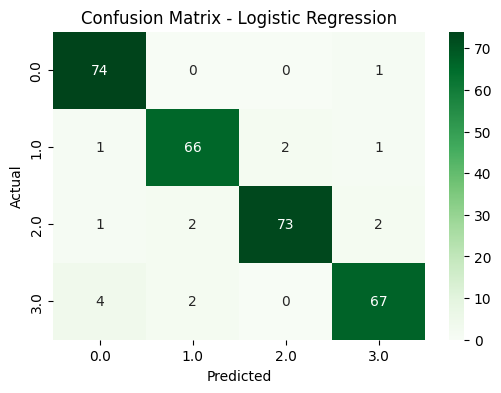


Random Forest Performance:
Akurasi: 0.90
F1-Score: 0.89
Laporan Klasifikasi:
               precision    recall  f1-score   support

         0.0       0.89      0.87      0.88        75
         1.0       0.91      0.83      0.87        70
         2.0       0.93      0.99      0.96        78
         3.0       0.86      0.89      0.87        73

    accuracy                           0.90       296
   macro avg       0.89      0.89      0.89       296
weighted avg       0.90      0.90      0.89       296



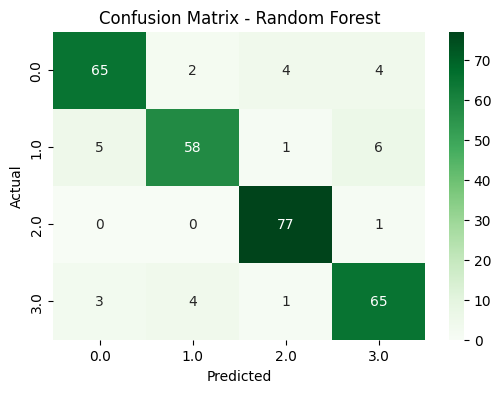

(0.8952702702702703,
 0.8945113652828064,
 array([[65,  2,  4,  4],
        [ 5, 58,  1,  6],
        [ 0,  0, 77,  1],
        [ 3,  4,  1, 65]]))

In [43]:
#evaluasi logistic regression
evaluate_model(y_test, y_pred_lr, "Logistic Regression")

#evaluasi random forest
evaluate_model(y_test, y_pred_rf, "Random Forest")

**1. Hasil Evaluasi Model**

Logistic Regression menunjukkan performa lebih baik dibandingkan Random Forest, dengan akurasi 95% dan F1-score 95%, sedangkan Random Forest memiliki akurasi 90% dan F1-score 89%. Ini mengindikasikan bahwa dataset memiliki hubungan linier antara fitur dan target, sehingga Logistic Regression dapat menangkap pola dengan baik tanpa perlu model yang lebih kompleks.

**2. Hasil Confusion Matrix**

Logistic Regression memiliki distribusi prediksi yang lebih seimbang di semua kelas. Precision dan recall yang tinggi pada setiap kategori menunjukkan bahwa model ini dapat mengenali pola dengan sangat baik tanpa banyak kesalahan klasifikasi.
- Kelas 0: 10 kesalahan klasifikasi (5 kelas 1, 4 kelas 2, 1 kelas 3).
- Kelas 1: 12 kesalahan klasifikasi (6 kelas 0, 1 kelas 2, 5 kelas 3).
- Kelas 2: 5 kesalahan klasifikasi (1 kelas 0, 4 kelas 3).
- Kelas 3: 6 kesalahan klasifikasi (3 kelas 0, 1 kelas 2, 2 kelas 1).

Random Forest menunjukkan sedikit kelemahan dalam membedakan kelas 1.0, dengan recall hanya 83%, yang berarti model ini sering salah mengklasifikasikan data di kelas tersebut sebagai kelas lain. Namun, pada kelas 2.0, Random Forest justru memiliki performa hampir sempurna, dengan recall 99%, menunjukkan bahwa model ini sangat andal dalam mengenali pola untuk kategori tersebut.
- Kelas 0: 10 kesalahan klasifikasi (2 kelas 1, 4 kelas 2, 4 kelas 3).
- Kelas 1: 12 kesalahan klasifikasi (5 kelas 0, 1 kelas 2, 6 kelas 3).
- Kelas 2: 1 kesalahan klasifikasi (1 kelas 3).
- Kelas 3: 8 kesalahan klasifikasi (3 kelas 0, 1 kelas 2, 4 kelas 1).

**3. Perbandingan Kedua Model**

Logistic Regression lebih cocok untuk dataset ini karena lebih sederhana, akurat, dan mudah diinterpretasikan. Random Forest, meskipun fleksibel dan dapat menangani hubungan non-linear, mengalami sedikit penurunan akurasi akibat ketidakseimbangan dalam mengenali beberapa kelas.

**Kesimpulan**

Logistic Regression lebih direkomendasikan untuk dataset ini karena memiliki akurasi lebih tinggi dan lebih stabil dalam mengklasifikasikan semua kelas. Random Forest masih bisa menjadi alternatif jika dataset di masa depan memiliki lebih banyak hubungan non-linear yang kompleks.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [44]:
#hyperparamter tuning RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 150],  #kurangi jumlah estimators agar tidak terlalu kompleks
    'max_depth': [None, 5, 10, 15],  #tambahkan batasan kedalaman pohon
    'min_samples_split': [2, 4, 6],  #coba nilai lebih kecil untuk menghindari overfitting
    'min_samples_leaf': [1, 2, 3]}

random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=42)

# Latih model dengan RandomizedSearchCV
random_search.fit(X_train, y_train)

# Model terbaik
best_rf = random_search.best_estimator_
print("\nHyperparameter terbaik:", random_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits

Hyperparameter terbaik: {'n_estimators': 150, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_depth': 10}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.


Random Forest Tuned Performance:
Akurasi: 0.88
F1-Score: 0.88
Laporan Klasifikasi:
               precision    recall  f1-score   support

         0.0       0.90      0.85      0.88        75
         1.0       0.89      0.83      0.86        70
         2.0       0.92      0.97      0.94        78
         3.0       0.82      0.86      0.84        73

    accuracy                           0.88       296
   macro avg       0.88      0.88      0.88       296
weighted avg       0.88      0.88      0.88       296



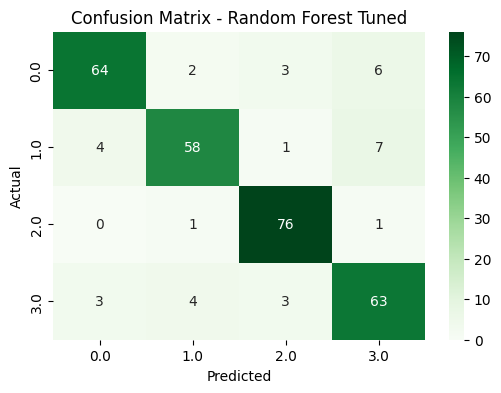

Random Forest Tuned - Accuracy: 0.8817567567567568
Random Forest Tuned - F1-Score: 0.8812882579678292
Confusion Matrix Random Forest Tuned:
 [[64  2  3  6]
 [ 4 58  1  7]
 [ 0  1 76  1]
 [ 3  4  3 63]]


In [45]:
# Prediksi dengan model terbaik
y_pred_best_rf = best_rf.predict(X_test)

# Evaluasi Random Forest setelah tuning
acc_best_rf, f1_best_rf, cm_best_rf = evaluate_model(y_test, y_pred_best_rf, "Random Forest Tuned")

print("Random Forest Tuned - Accuracy:", acc_best_rf)
print("Random Forest Tuned - F1-Score:", f1_best_rf)
print("Confusion Matrix Random Forest Tuned:\n", cm_best_rf)

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

1. Dalam perbandingan dua model ini, Logistic Regression terbukti lebih akurat dibandingkan Random Forest. Logistic Regression memiliki akurasi 95%, sedangkan Random Forest sebelum tuning mencapai 90%, dan setelah tuning justru turun menjadi 88%. Ini berarti bahwa Logistic Regression mampu memprediksi data dengan lebih baik, sedangkan Random Forest masih memiliki kelemahan dalam menangkap pola data.

2. Melihat hasil sebelum dan setelah tuning, Random Forest justru mengalami sedikit penurunan akurasi, yang menunjukkan bahwa pengaturan baru belum optimal. Hal ini bisa disebabkan oleh pemilihan parameter yang kurang tepat, seperti jumlah pohon dalam hutan atau kedalaman maksimum pohon. Model ini juga tampak lebih sering melakukan kesalahan dalam mengklasifikasikan beberapa kategori data.

3. Untuk meningkatkan Random Forest, kita bisa mencoba menggunakan teknik tuning yang lebih baik, seperti Grid Search agar model bisa menemukan kombinasi parameter terbaik. Selain itu, kita juga bisa melakukan pembersihan data yang lebih baik dan mencoba menggunakan lebih banyak fitur yang relevan agar model bisa belajar dengan lebih akurat dan bisa juga kita perbanyak datanya.

**Kesimpulannya**

Dalam kasus ini, Logistic Regression lebih cocok digunakan karena lebih akurat dan lebih stabil, sementara Random Forest masih bisa diperbaiki dengan tuning yang lebih cermat. Jika ingin hasil yang lebih baik, kita perlu mencoba beberapa pengaturan tambahan atau mempertimbangkan kembali apakah Random Forest adalah pilihan yang tepat untuk dataset ini.